In [1]:
##### Imports here !!!
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import math

# Sept + Aug

In [95]:
inbox_direc = '/home/surya/.mutt/cache/bodies/imaps:ee18btech11026@iith.ac.in@imap.gmail.com:993/INBOX'

day = []
mon = []
year = []
hour = []
minute = []
sec = []

for filename in os.listdir(inbox_direc):
    with open(os.path.join(inbox_direc, filename),"r") as f :
        data= f.read().splitlines()
        
        data = data[2][13:32]
        try : 
            d = datetime.strptime(data, "%d %b %Y  %H:%M:%S")
        except:
            continue
        day.append(d.day)
        mon.append(d.month)
        year.append(d.year)
        hour.append( (d.hour + 12)%24 ) 
        minute.append(d.minute)
        sec.append(d.second)

df = pd.DataFrame()
df['day'] = day
df['mon'] = mon
df['year'] = year
df['hour'] = hour
df['min'] = minute
df['sec'] = sec

print(len(df))

mails_per_hour = df.groupby(['day','mon', 'hour']).size().sort_values(ascending=False).reset_index(name='count') 
print(mails_per_hour)

1580
     day  mon  hour  count
0     12    9    15     10
1     15    8    10     10
2     18    8     9      9
3      2    9     9      9
4      6    8    12      9
..   ...  ...   ...    ...
760   12    8    17      1
761   23    9     7      1
762   23    9     6      1
763   23    9     2      1
764    1    8     0      1

[765 rows x 4 columns]


{0: 34, 1: 17, 2: 12, 3: 2, 4: 10, 5: 14, 6: 15, 7: 38, 8: 62, 9: 155, 10: 128, 11: 130, 12: 128, 13: 82, 14: 103, 15: 119, 16: 95, 17: 93, 18: 65, 19: 55, 20: 72, 21: 73, 22: 48, 23: 30}
{0: 0.021518987341772152, 1: 0.010759493670886076, 2: 0.007594936708860759, 3: 0.0012658227848101266, 4: 0.006329113924050633, 5: 0.008860759493670886, 6: 0.00949367088607595, 7: 0.024050632911392405, 8: 0.039240506329113925, 9: 0.0981012658227848, 10: 0.0810126582278481, 11: 0.08227848101265822, 12: 0.0810126582278481, 13: 0.05189873417721519, 14: 0.06518987341772152, 15: 0.07531645569620253, 16: 0.060126582278481014, 17: 0.05886075949367089, 18: 0.04113924050632911, 19: 0.03481012658227848, 20: 0.04556962025316456, 21: 0.046202531645569624, 22: 0.030379746835443037, 23: 0.0189873417721519}


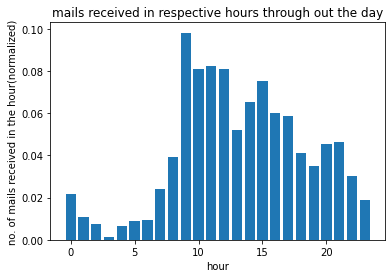

In [97]:
### finding no. of mails at different times of the day..

### creating a dictionary
hr2freq_dict = {}
total = 0

for i in mails_per_hour.values : 
    hr, cnt = i[2], i[3]
    if(hr in hr2freq_dict):
        hr2freq_dict[hr] = hr2freq_dict[hr] + cnt
    else:
        hr2freq_dict[hr] = cnt
    total = total + cnt
    
hr2freq_dict = dict(sorted(hr2freq_dict.items(), key= lambda x:x[0]) )
print(hr2freq_dict)
### Normalizing ...

for hr,cnt in hr2freq_dict.items():
    hr2freq_dict[hr] = hr2freq_dict[hr]/total 

print(hr2freq_dict)


### plotting hist
plt.bar( hr2freq_dict.keys(),hr2freq_dict.values()  )
plt.xlabel("hour")
plt.ylabel("no. of mails received in the hour(normalized)")
plt.title("mails received in respective hours through out the day")
plt.savefig('/home/surya/ACADEMIA/Academia_Github_repo/ACADEMIA/C_DS_4_1/Asst_1/beamer/che1.png')
plt.show()

In [24]:
'''
Filtering all the mails received throughout september from 10 am to 7pm 
'''

def find_mean_of_hr(mails_per_hour,hr):
    working_hrs = mails_per_hour.loc[ (mails_per_hour['mon'] >=8 ) & (mails_per_hour['hour'] == hr) ]
    
    hr_dict = {0: 60 - len(working_hrs)}
    for i in working_hrs['count']:
        if(i in hr_dict):
            hr_dict[i] = hr_dict[i] + 1
        else :
            hr_dict[i] = 1
            
    #print(hr_dict)
    
    mean, total = 0, 0
    for mails_no,cnt in hr_dict.items():
        mean = mean + mails_no*cnt
        total = total + cnt
    print(total)
    return hr_dict, (mean/total)

hr_dict, mean = find_mean_of_hr(mails_per_hour,10)




60


In [47]:
def find_mean_of_all_hrs(mails_per_hour, x = [10,11]):
    working_hrs = mails_per_hour.loc[ (mails_per_hour['mon'] >=8 ) & mails_per_hour['hour'].isin(x)  ]
    temp = df.loc[(df['mon'] >=8 ) & df['hour'].isin(x)]
    datapoints = len(temp)
    hr_dict = {0: 61*(len(x)) - len(working_hrs)}
    for i in working_hrs['count']:
        if(i in hr_dict):
            hr_dict[i] = hr_dict[i] + 1
        else :
            hr_dict[i] = 1
            
    
    mean, total = 0, 61*len(x)
    for mails_no,cnt in hr_dict.items():
        mean = mean + mails_no*cnt
        hr_dict[mails_no] = hr_dict[mails_no]/total 
        
    return hr_dict, (mean/total), datapoints


## poisson 

def poisson_pmf(x_list, lam):
    ans = []
    for x in x_list:
        y = np.exp(-1*lam)*pow(lam,x)/(math.factorial(x))
        ans.append(y)
    return ans


In [60]:

net_mean = 0
for hr,freq in hr2freq_dict.items():
    net_mean = net_mean + freq*find_mean_of_hr(mails_per_hour,hr)
print(net_mean)

1.5915928270042194


2.1416666666666666


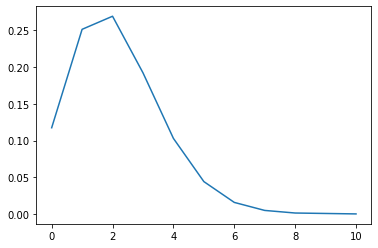

In [63]:



## poisson 

def poisson_pmf(x_list, lam):
    ans = []
    for x in x_list:
        y = np.exp(-1*lam)*pow(lam,x)/(math.factorial(x))
        ans.append(y)
    return ans

x = np.sort(  list(hr_dict.keys()).copy())
f1 = poisson_pmf(x, lam1)

print(lam1)
#f2 = poisson_pmf(x, net_mean)

plt.plot(x,f1)
#plt.plot(x,f2)

{0: 0.21666666666666667, 10: 0.016666666666666666, 8: 0.016666666666666666, 7: 0.016666666666666666, 6: 0.03333333333333333, 5: 0.06666666666666667, 4: 0.016666666666666666, 3: 0.13333333333333333, 2: 0.23333333333333334, 1: 0.25}
2.1333333333333333
2.1333333333333333


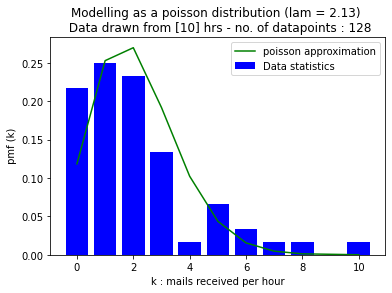

In [98]:
a = [10]
hr_dict, lam1, _len = find_mean_of_all_hrs(mails_per_hour, x = a)
print(hr_dict)
print(lam1)

## poisson 
x = np.sort(  list(hr_dict.keys()).copy())
f1 = poisson_pmf(x, lam1)

print(lam1)





plt.bar(list(hr_dict.keys()), list(hr_dict.values()), color = 'blue', label = 'Data statistics') 
plt.plot(x,f1, color = 'green', label= 'poisson approximation')
plt.title("Modelling as a poisson distribution (lam = %.2f) \n Data drawn from %s hrs - no. of datapoints : %d"%(lam1,str(a), _len))
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.legend()
plt.savefig('/home/surya/ACADEMIA/Academia_Github_repo/ACADEMIA/C_DS_4_1/Asst_1/beamer/che2.png')
plt.show()

{0: 0.2, 10: 0.008333333333333333, 8: 0.008333333333333333, 7: 0.016666666666666666, 6: 0.025, 5: 0.06666666666666667, 4: 0.041666666666666664, 3: 0.18333333333333332, 2: 0.225, 1: 0.225}
2.1416666666666666
2.1416666666666666


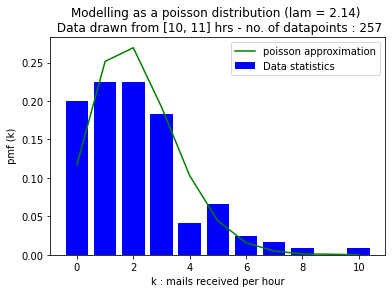

In [99]:
a = [10,11]
hr_dict, lam1, _len = find_mean_of_all_hrs(mails_per_hour, x = a)
print(hr_dict)
print(lam1)

## poisson 
x = np.sort(  list(hr_dict.keys()).copy())
f1 = poisson_pmf(x, lam1)

print(lam1)





plt.bar(list(hr_dict.keys()), list(hr_dict.values()), color = 'blue', label = 'Data statistics') 
plt.plot(x,f1, color = 'green', label= 'poisson approximation')
plt.title("Modelling as a poisson distribution (lam = %.2f) \n Data drawn from %s hrs - no. of datapoints : %d"%(lam1,str(a), _len))
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.legend()
plt.savefig('/home/surya/ACADEMIA/Academia_Github_repo/ACADEMIA/C_DS_4_1/Asst_1/beamer/che3.png')
plt.show()

{0: 0.20555555555555555, 10: 0.005555555555555556, 9: 0.005555555555555556, 8: 0.005555555555555556, 7: 0.011111111111111112, 6: 0.016666666666666666, 5: 0.06666666666666667, 4: 0.06666666666666667, 3: 0.17777777777777778, 2: 0.2388888888888889, 1: 0.2}
2.138888888888889
2.138888888888889


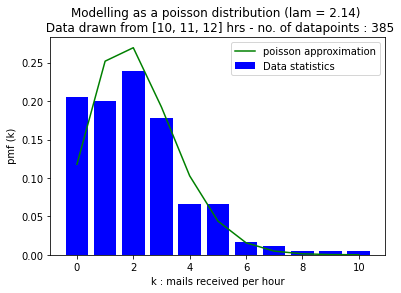

In [100]:
a = [10,11,12]
hr_dict, lam1, _len = find_mean_of_all_hrs(mails_per_hour, x = a)
print(hr_dict)
print(lam1)

## poisson 
x = np.sort(  list(hr_dict.keys()).copy())
f1 = poisson_pmf(x, lam1)

print(lam1)





plt.bar(list(hr_dict.keys()), list(hr_dict.values()), color = 'blue', label = 'Data statistics') 
plt.plot(x,f1, color = 'green', label= 'poisson approximation')
plt.title("Modelling as a poisson distribution (lam = %.2f) \n Data drawn from %s hrs - no. of datapoints : %d"%(lam1,str(a), _len))
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.legend()
plt.savefig('/home/surya/ACADEMIA/Academia_Github_repo/ACADEMIA/C_DS_4_1/Asst_1/beamer/che4.png')
plt.show()

{0: 0.2125, 10: 0.008333333333333333, 9: 0.004166666666666667, 8: 0.004166666666666667, 7: 0.008333333333333333, 6: 0.016666666666666666, 5: 0.058333333333333334, 4: 0.07083333333333333, 3: 0.18333333333333332, 2: 0.22916666666666666, 1: 0.20416666666666666}
2.1
2.1


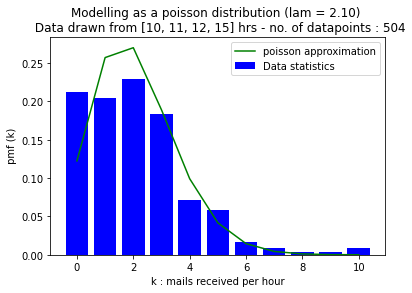

In [101]:
a = [10,11,12,15]
hr_dict, lam1, _len = find_mean_of_all_hrs(mails_per_hour, x = a)
print(hr_dict)
print(lam1)

## poisson 
x = np.sort(  list(hr_dict.keys()).copy())
f1 = poisson_pmf(x, lam1)

print(lam1)





plt.bar(list(hr_dict.keys()), list(hr_dict.values()), color = 'blue', label = 'Data statistics') 
plt.plot(x,f1, color = 'green', label= 'poisson approximation')
plt.title("Modelling as a poisson distribution (lam = %.2f) \n Data drawn from %s hrs - no. of datapoints : %d"%(lam1,str(a), _len))
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.savefig('/home/surya/ACADEMIA/Academia_Github_repo/ACADEMIA/C_DS_4_1/Asst_1/beamer/che5.png')
plt.legend()
plt.show()

# Update

In [2]:
### considering the two months data as a time series i.e we have (24*60 = 1440 data points)
inbox_direc = '/home/surya/.mutt/cache/bodies/imaps:ee18btech11026@iith.ac.in@imap.gmail.com:993/INBOX'

day = []
mon = []
year = []
hour = []
minute = []
sec = []

for filename in os.listdir(inbox_direc):
    with open(os.path.join(inbox_direc, filename),"r") as f :
        data= f.read().splitlines()
        
        data = data[2][13:32]
        try : 
            d = datetime.strptime(data, "%d %b %Y  %H:%M:%S")
        except:
            continue
        day.append(d.day)
        mon.append(d.month)
        year.append(d.year)
        hour.append( (d.hour + 12)%24 ) 
        minute.append(d.minute)
        sec.append(d.second)

df = pd.DataFrame()
df['day'] = day
df['mon'] = mon
df['year'] = year
df['hour'] = hour
df['min'] = minute
df['sec'] = sec

print(len(df))

mails_per_hour = df.groupby(['day','mon', 'hour']).size().sort_values(ascending=False).reset_index(name='count') 
print(mails_per_hour.loc[mails_per_hour['mon'] == 7])



1580
     day  mon  hour  count
514   31    7    11      1
517   31    7     9      1
518   31    7     8      1


In [3]:
### creating time series of the data..

mails_per_hour["hr_index"] = (mails_per_hour["mon"]-8)*31*24 + (mails_per_hour["day"]-1)*24 + mails_per_hour["hour"]
mails_per_hour = mails_per_hour.loc[ (mails_per_hour['hr_index'] >= 0 )] ### ignoring july emails

print(np.amax(mails_per_hour['hr_index']) )



1462


[1. 0. 0. ... 0. 1. 0.]


Text(0, 0.5, 'No. of emails received in an hour')

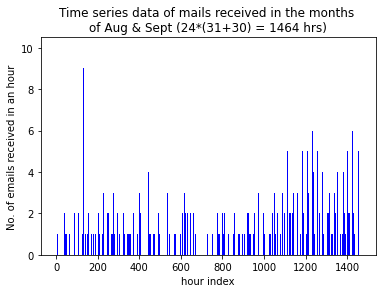

In [35]:
time_series_h = np.zeros(np.amax(mails_per_hour['hr_index']))
for _, row in mails_per_hour.iterrows():
    time_series_h[row['hr_index']] = row['count']
print(time_series_h)

plt.bar(np.arange(1464), time_series_h, color = 'blue')
plt.title("Time series data of mails received in the months \nof Aug & Sept (24*(31+30) = 1464 hrs)")
plt.xlabel("hour index")
plt.ylabel("No. of emails received in an hour")

[1. 0. 0. ... 0. 1. 0.]


Text(0, 0.5, 'No. of emails received in an hour')

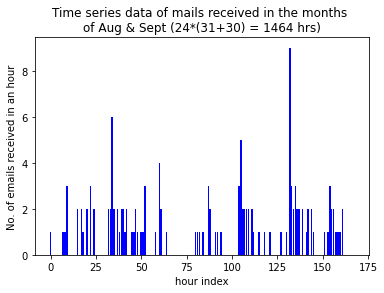

In [59]:
time_series_h = np.zeros(1464)
for _, row in mails_per_hour.iterrows():
    time_series_h[row['hr_index']] = row['count']
print(time_series_h)

plt.bar(np.arange(24*7), time_series_h[:7*24], color = 'blue')
plt.title("Time series data of mails received in the months \nof Aug & Sept (24*(31+30) = 1464 hrs)")
plt.xlabel("hour index")
plt.ylabel("No. of emails received in an hour")

{0: 0.47950819672131145, 10: 0.001366120218579235, 9: 0.0020491803278688526, 8: 0.001366120218579235, 7: 0.0020491803278688526, 6: 0.007513661202185792, 5: 0.02117486338797814, 4: 0.030054644808743168, 3: 0.07240437158469945, 2: 0.1489071038251366, 1: 0.2336065573770492}
1.0771857923497268
1.0771857923497268


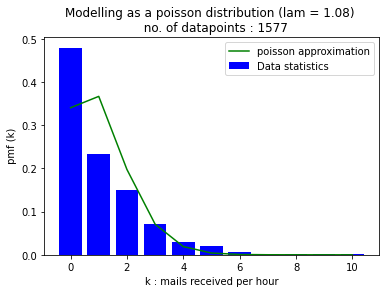

In [67]:
a = np.arange(24)
hr_dict, lam1, _len = find_mean_of_all_hrs(mails_per_hour, x = a)
print(hr_dict)
print(lam1)

## poisson 
x = np.sort(  list(hr_dict.keys()).copy())
f1 = poisson_pmf(x, lam1)

print(lam1)





plt.bar(list(hr_dict.keys()), list(hr_dict.values()), color = 'blue', label = 'Data statistics') 
plt.plot(x,f1, color = 'green', label= 'poisson approximation')
plt.title("Modelling as a poisson distribution (lam = %.2f) \n  no. of datapoints : %d"%(lam1, _len))
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.legend()
#plt.savefig('/home/surya/ACADEMIA/Academia_Github_repo/ACADEMIA/C_DS_4_1/Asst_1/beamer/che4.png')
plt.show()

### zero inflated poisson

In [56]:
m = np.mean(time_series_h)
var = np.var(time_series_h)


## finding model estimates
_lam = ((var + (m**2) )/m) - 1
_pi = (var - m)/(var + (m**2) -m )

print(_lam, _pi)
## poisson 

def zero_poisson_pmf(x_list, lam, pi):
    ans = []
    for x in x_list:
        
        if(x == 0):
            y = pi + ( (1-_pi)*(np.exp(-1*lam)*pow(lam,x)/(math.factorial(x)) ) )
        else:
            y = (1-_pi)*(np.exp(-1*lam)*pow(lam,x)/(math.factorial(x)) )
        ans.append(y)
    return ans

2.0190234622701335 0.4664817856358294


[0.5373250398336658, 0.14303419236899856, 0.1443946951499339, 0.09717875911168666, 0.04905154867019822, 0.019807245525163115, 0.006665215573041573, 0.0019224609461513155, 0.00048518671944719325, 0.00010884481890508445, 2.197602431159093e-05]


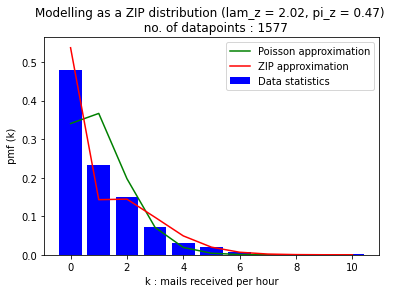

In [71]:
a = np.arange(24)
hr_dict, lam1, _len = find_mean_of_all_hrs(mails_per_hour, x = a)


## poisson 
x = np.sort(  list(hr_dict.keys()).copy())
f2 = zero_poisson_pmf(x, _lam, _pi)

print(f2)




plt.bar(list(hr_dict.keys()), list(hr_dict.values()), color = 'blue', label = 'Data statistics') 
plt.plot(x,f1,color = 'green', label= 'Poisson approximation' )
plt.plot(x,f2, color = 'red', label= 'ZIP approximation')
plt.title("Modelling as a ZIP distribution (lam_z = %.2f, pi_z = %.2f) \n  no. of datapoints : %d"%(_lam,_pi, _len))
plt.xlabel('k : mails received per hour')
plt.ylabel(' pmf (k)')
plt.legend()
#plt.savefig('/home/surya/ACADEMIA/Academia_Github_repo/ACADEMIA/C_DS_4_1/Asst_1/beamer/che4.png')
plt.show()